In [1]:
import nbsetup
from models.sparc.result import Result

In [2]:
from references.sparc import adjustment_df
adjs = adjustment_df()

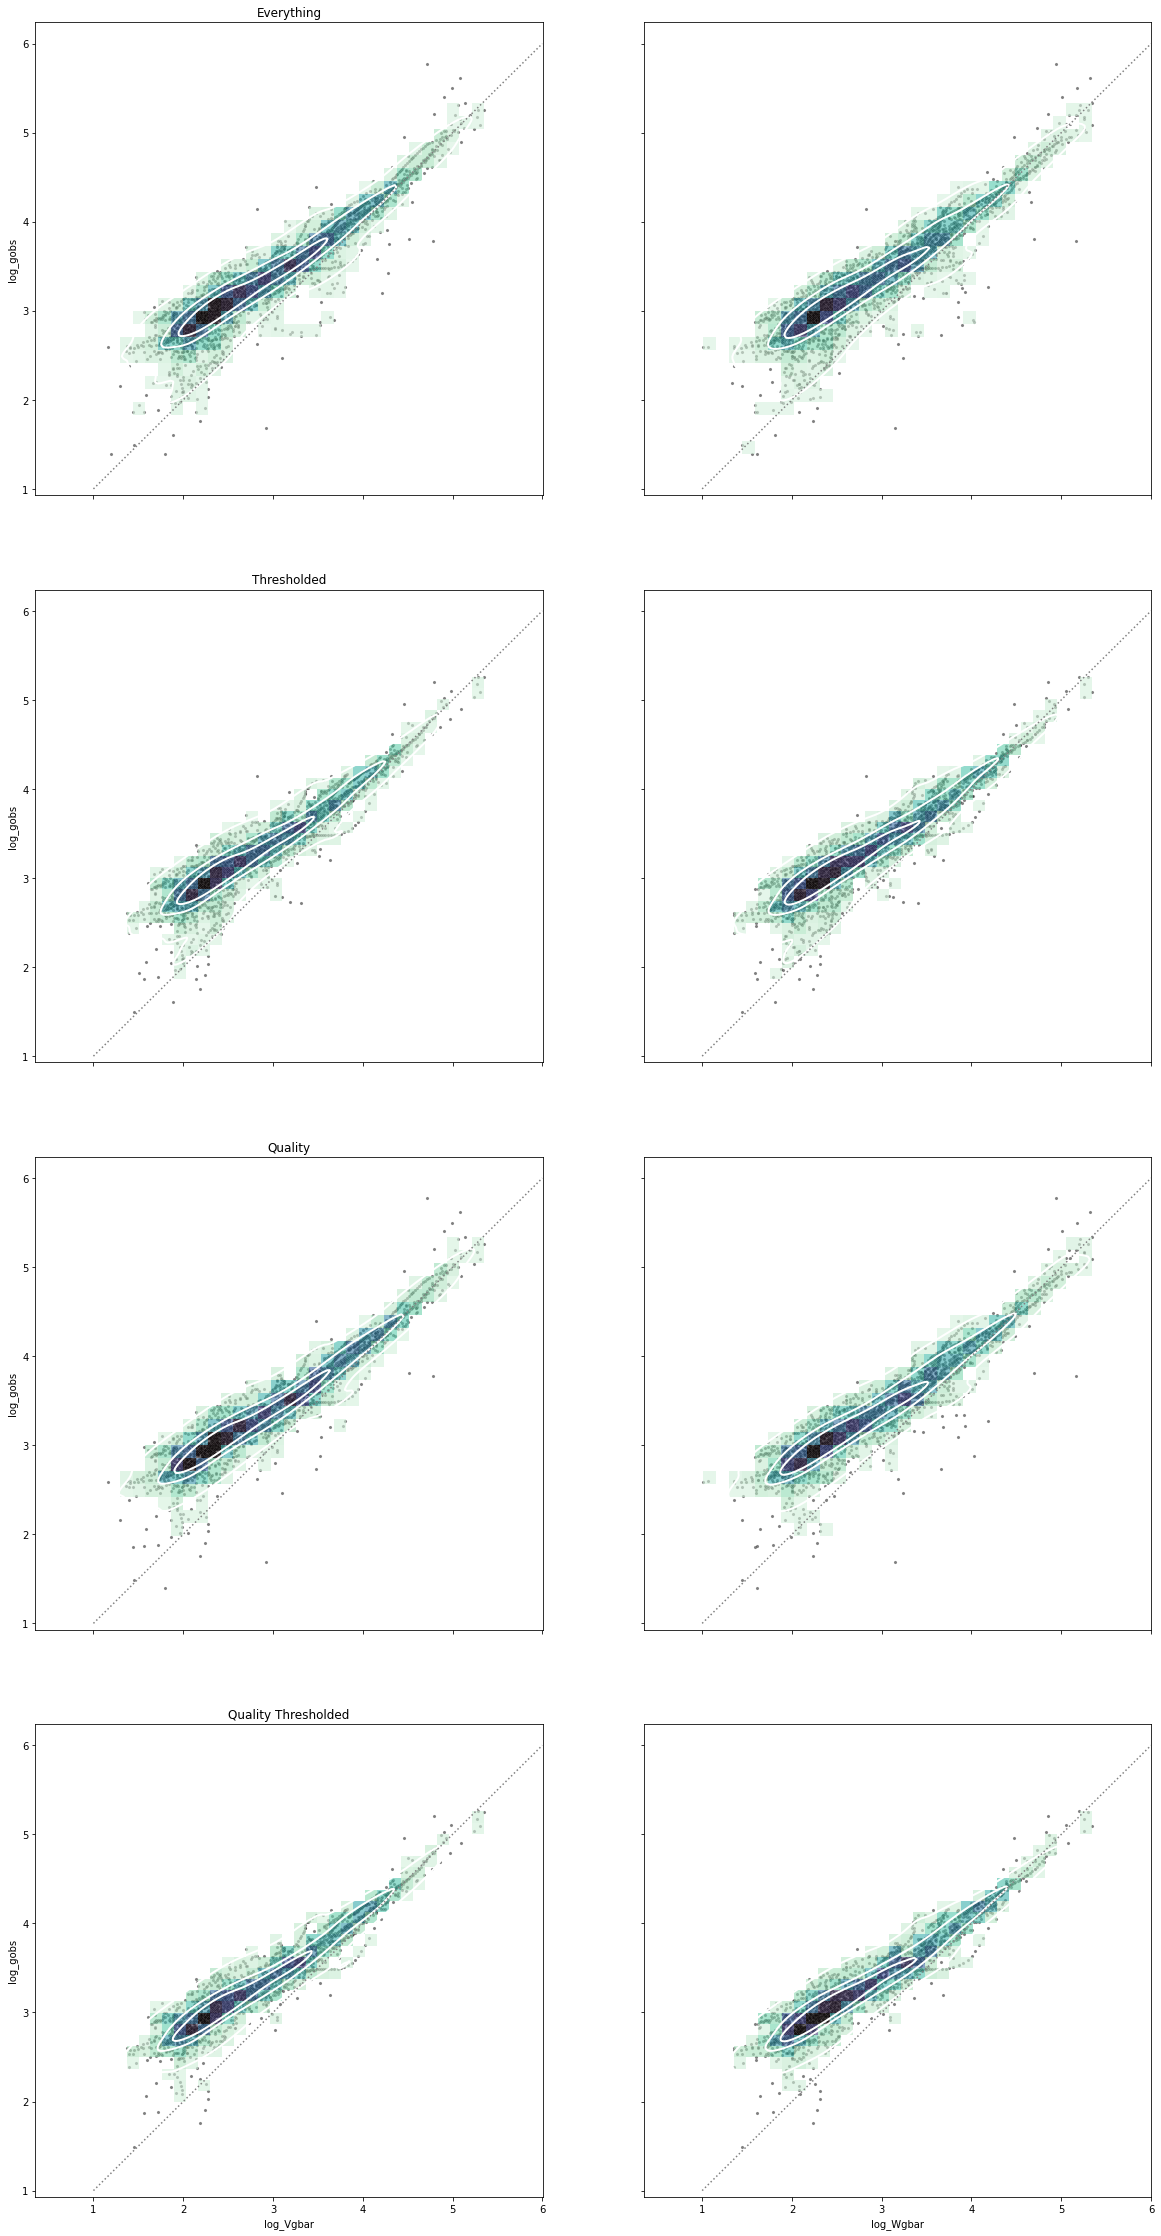

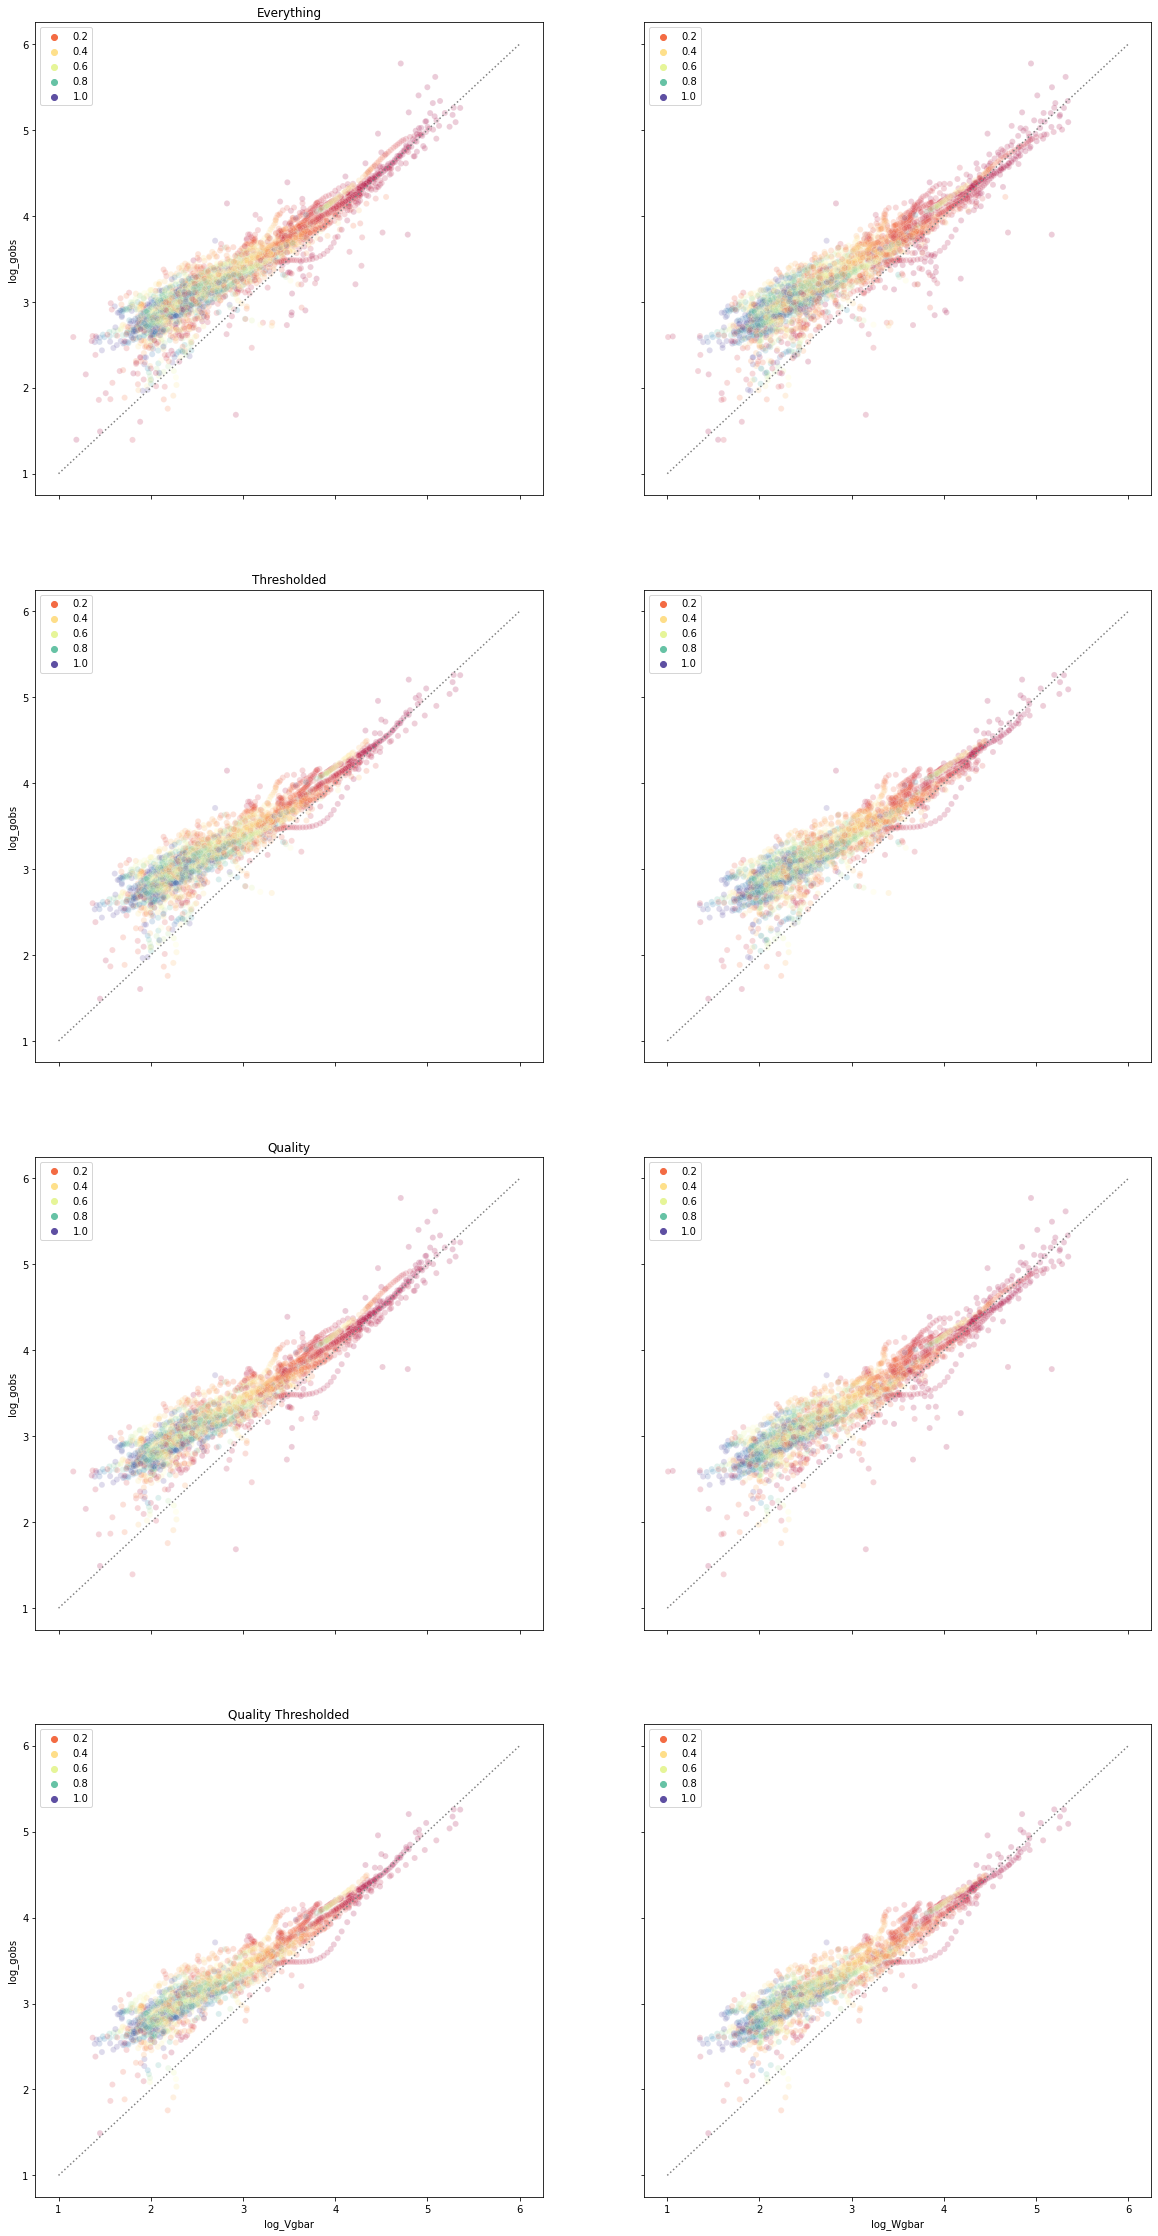

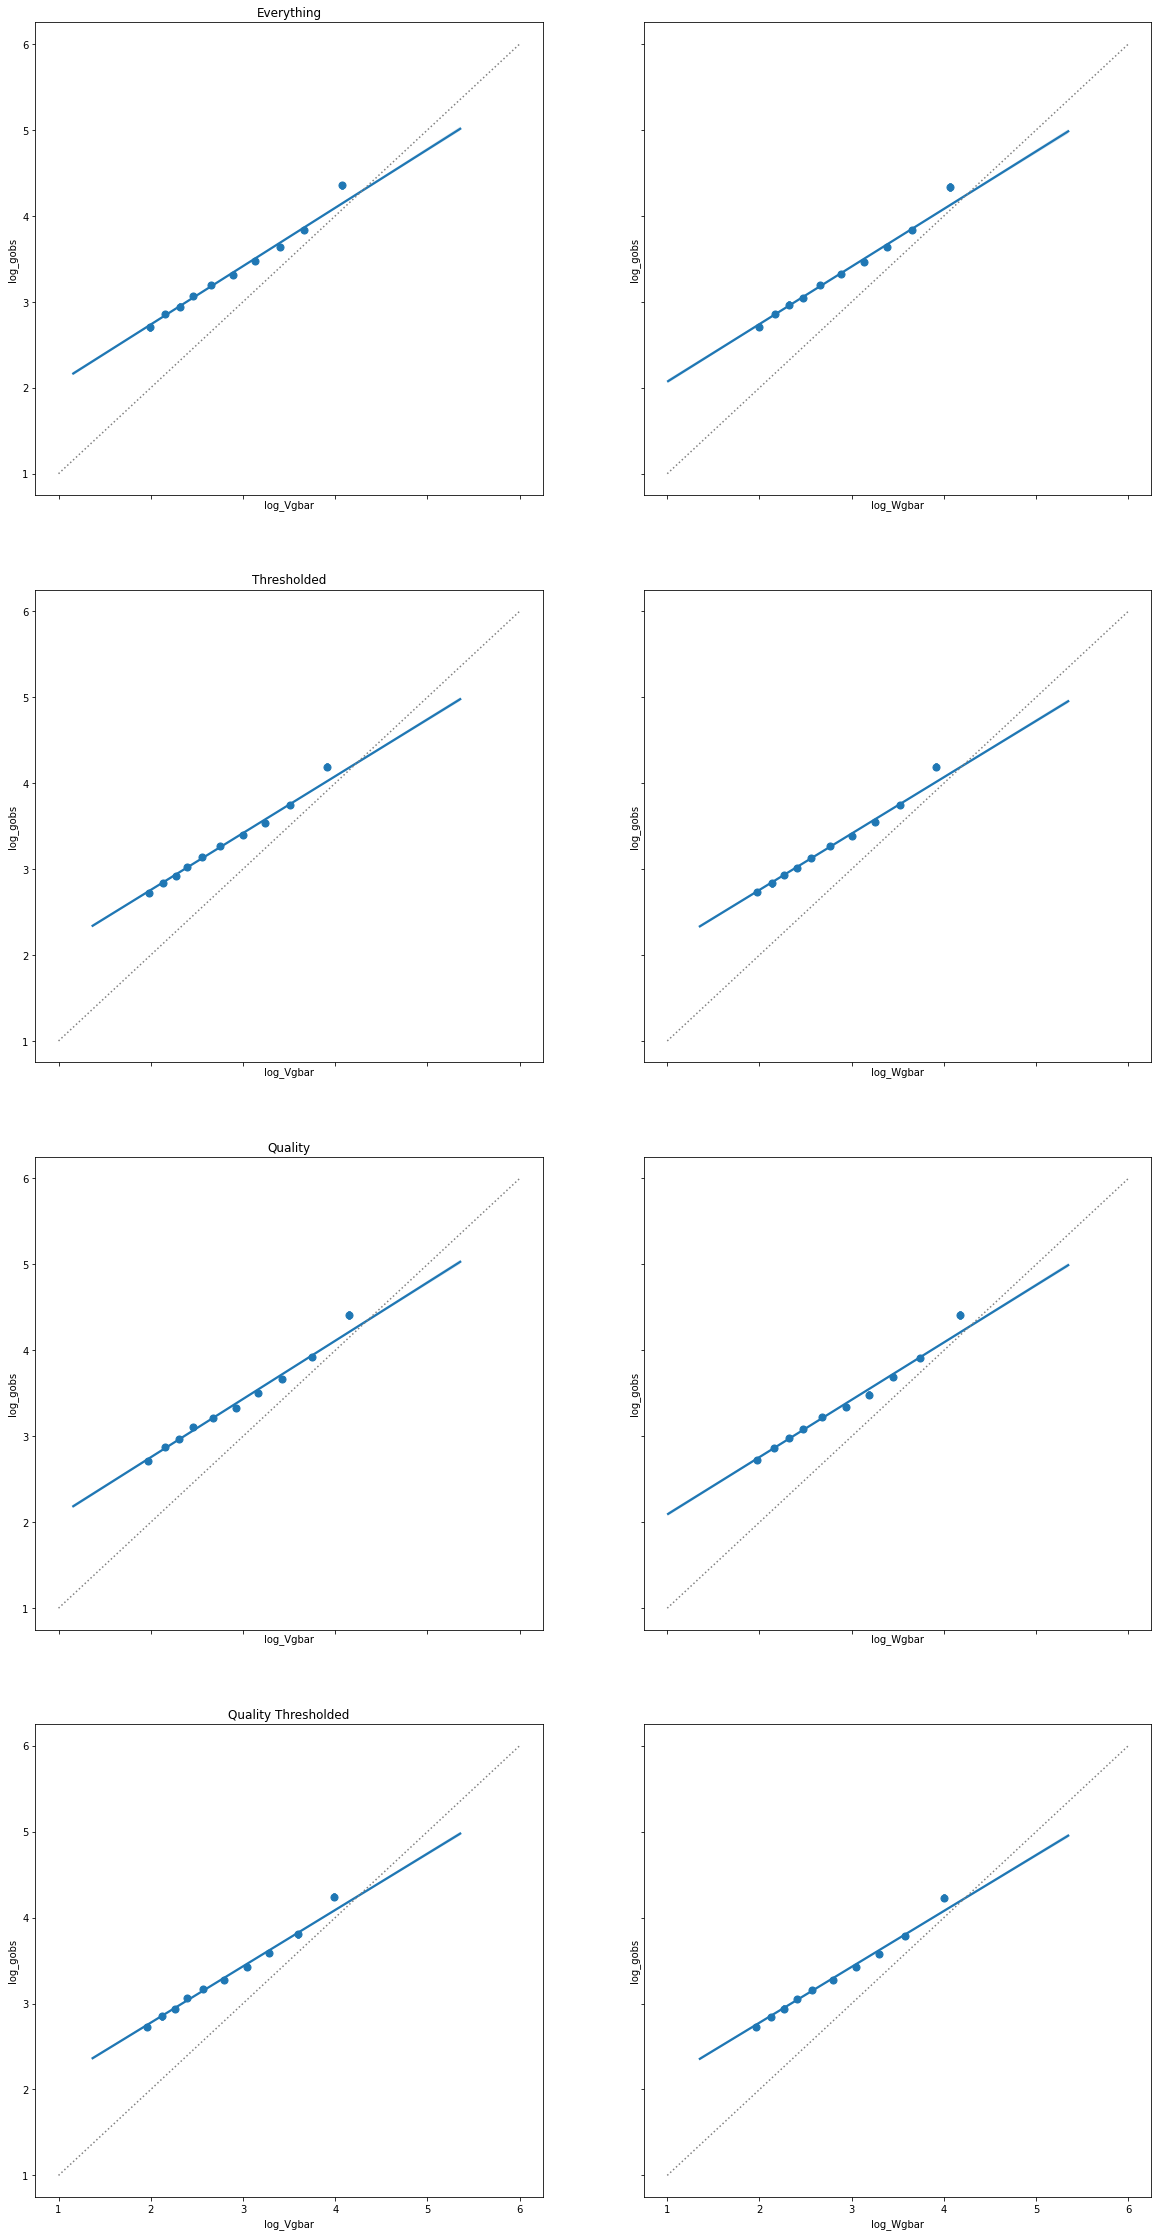

In [3]:
sparc = Result(adjustments=adjs.query("Source=='SPARC'"))
sparc.plot_rars()

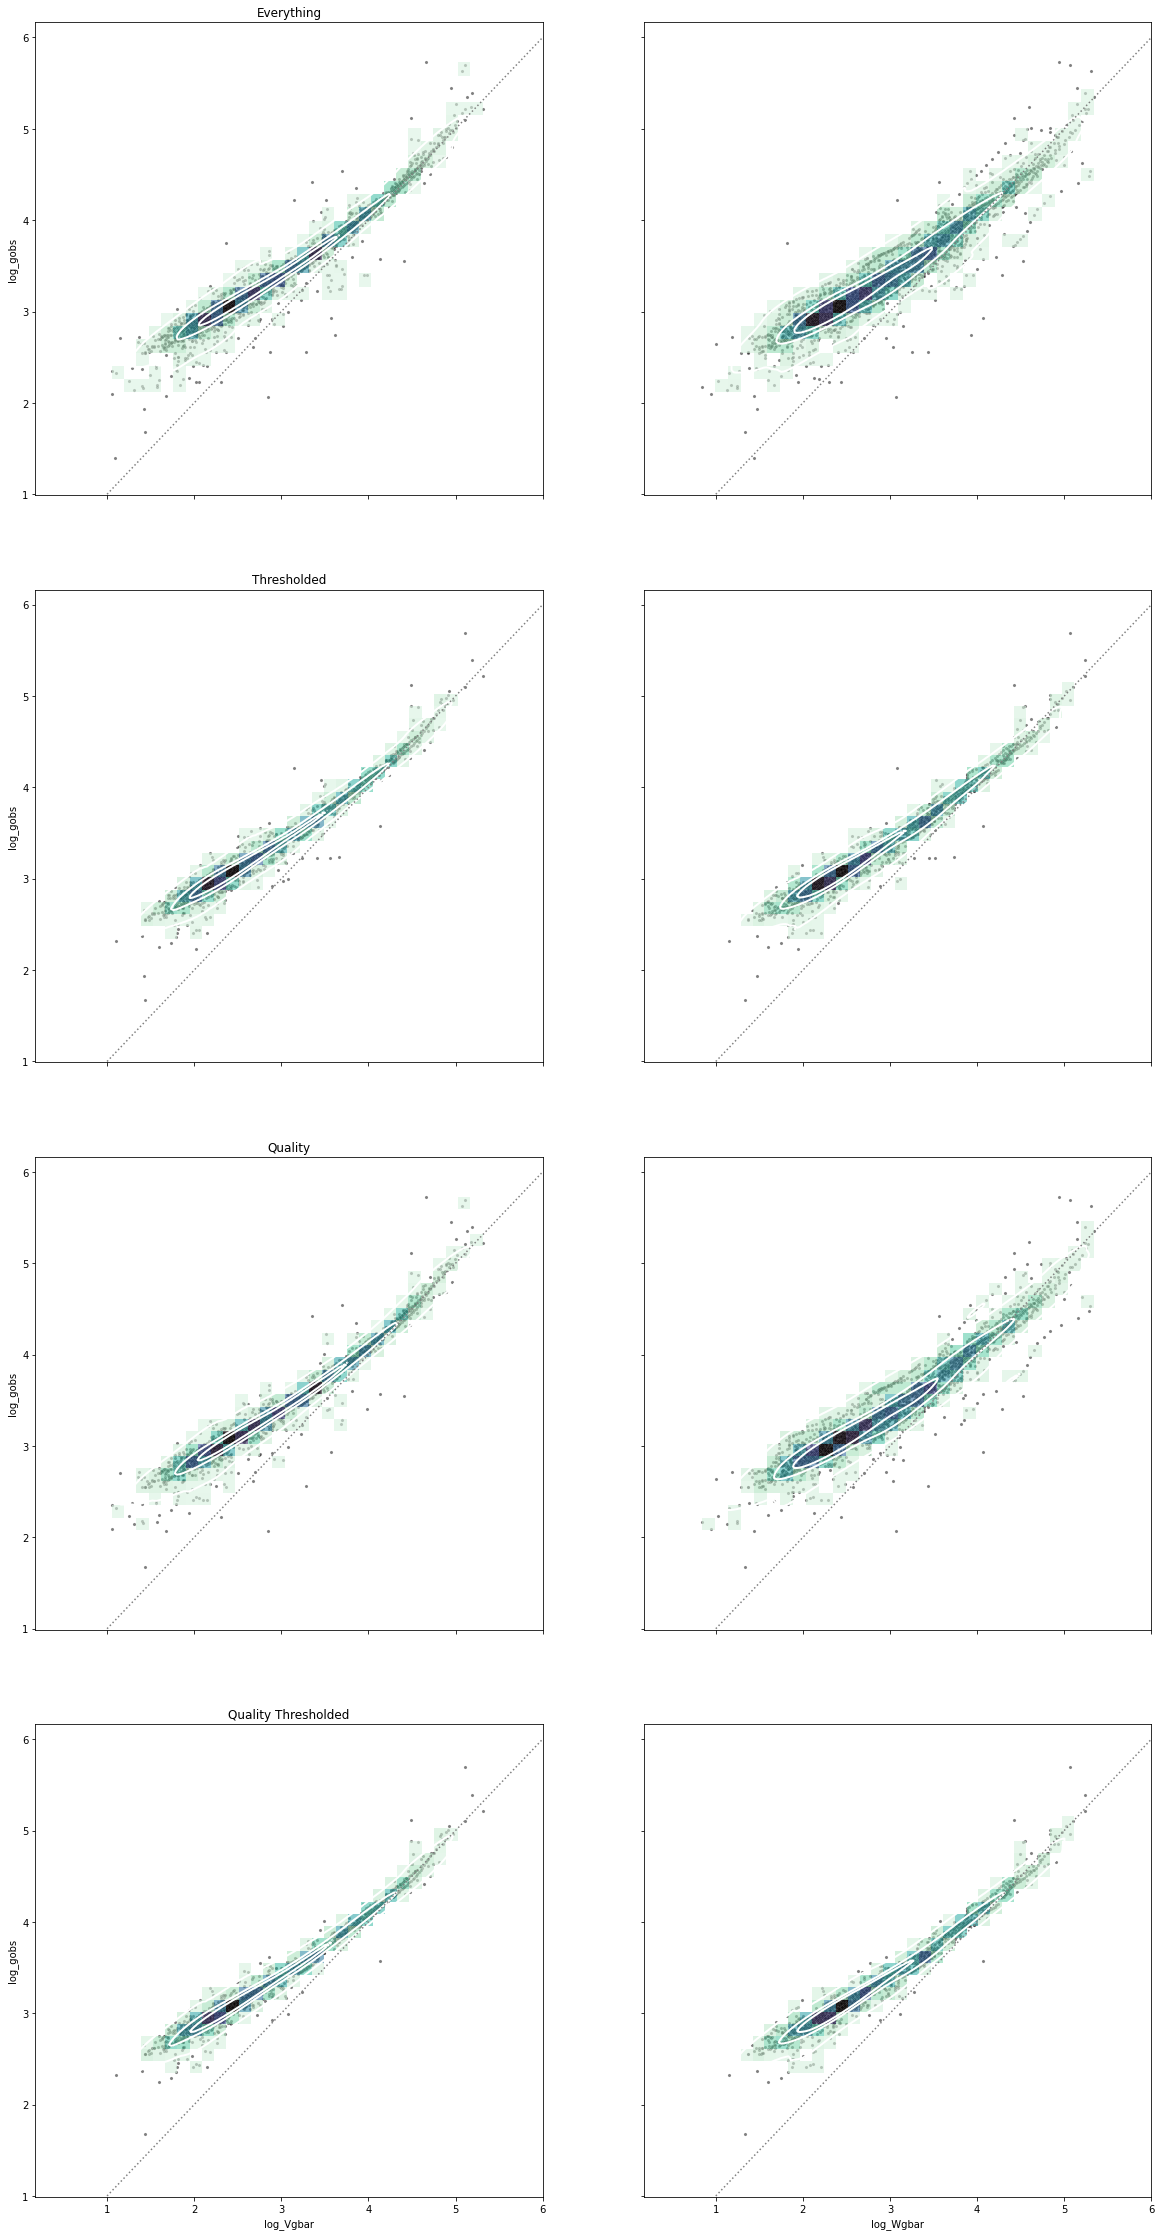

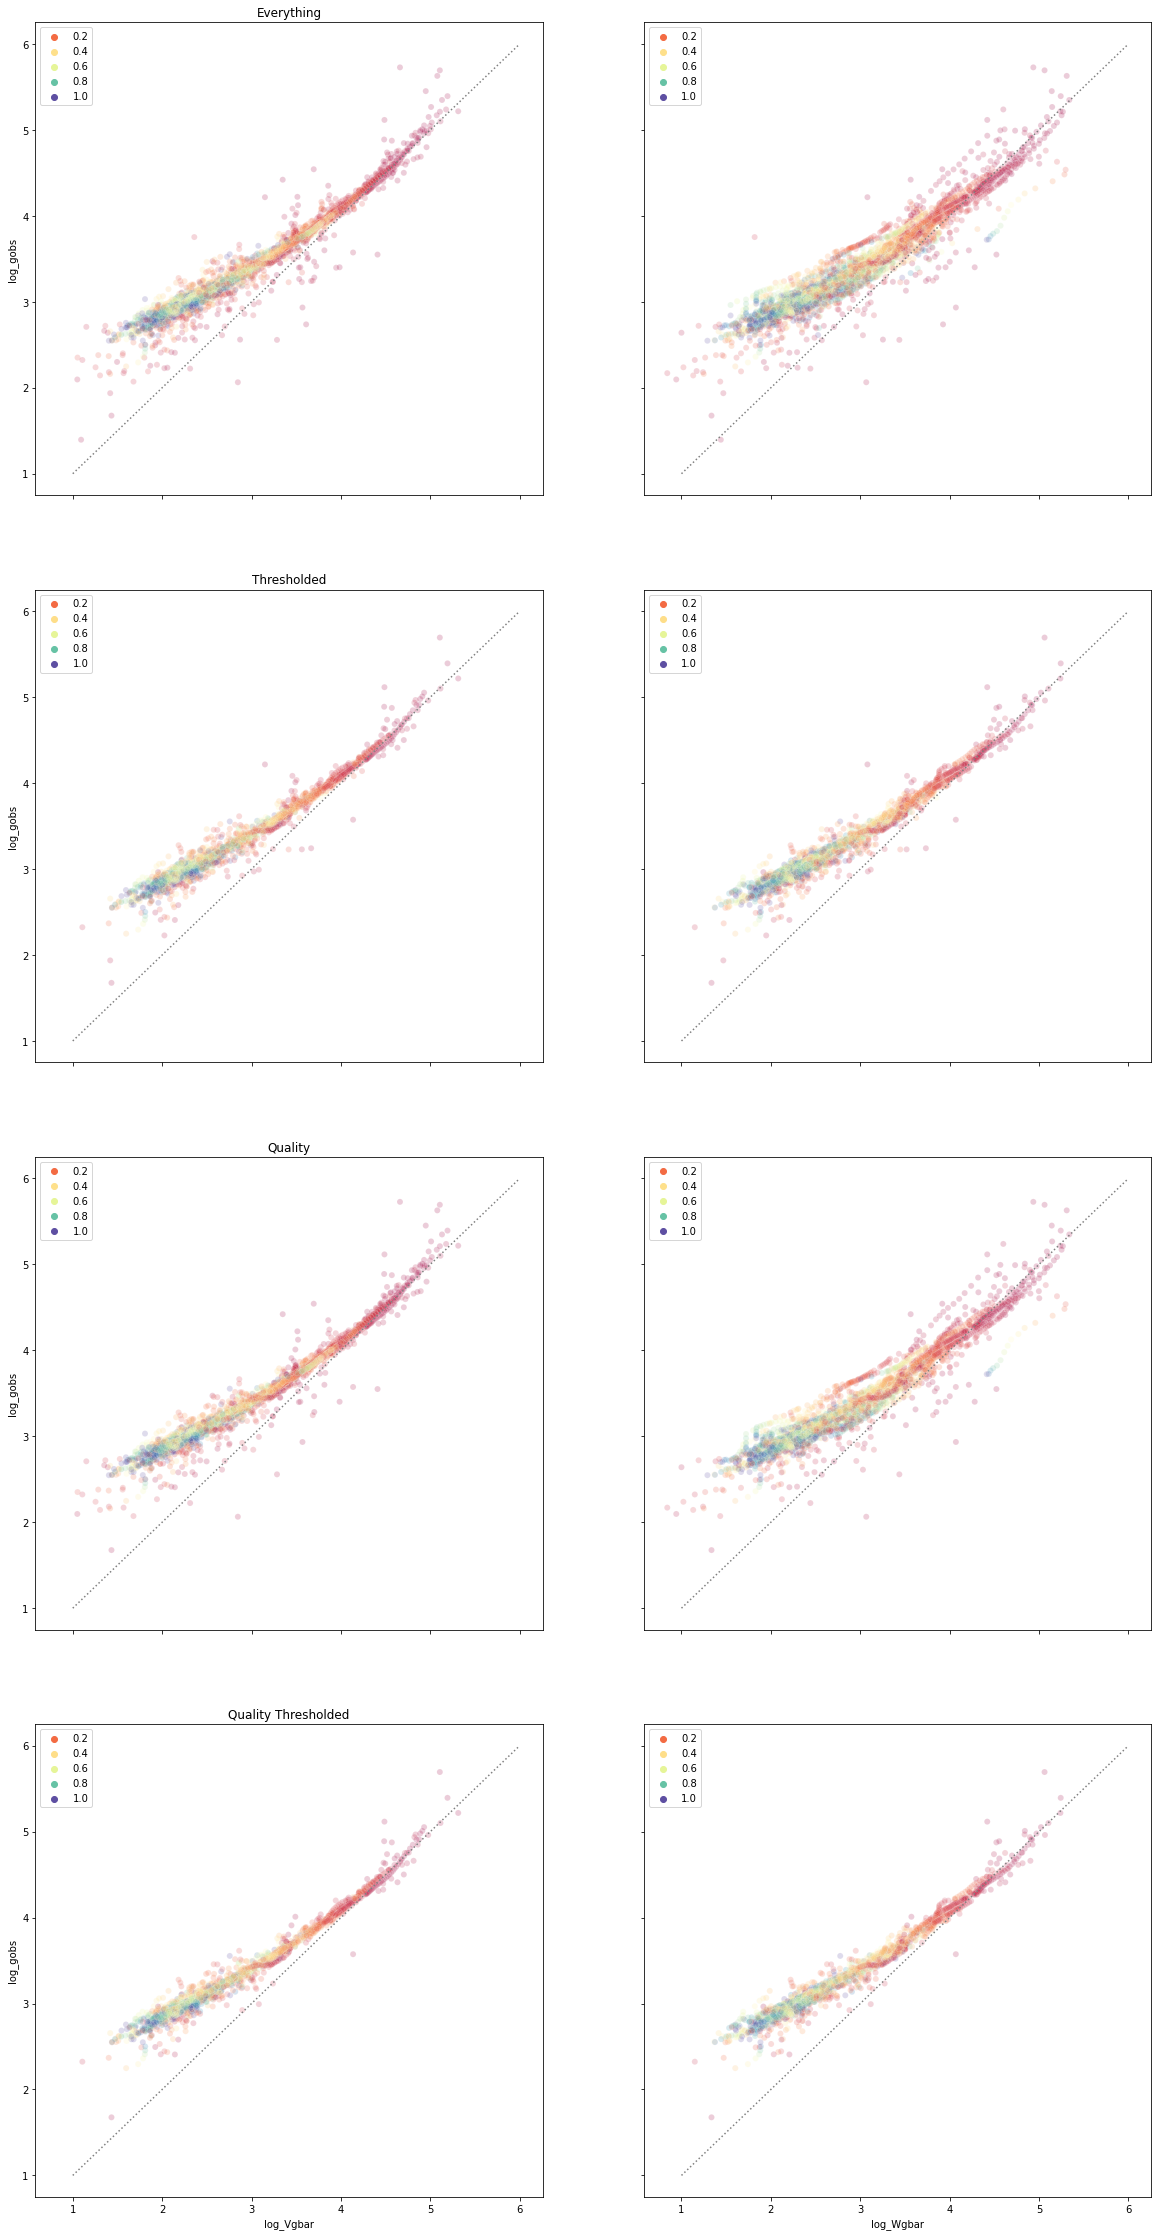

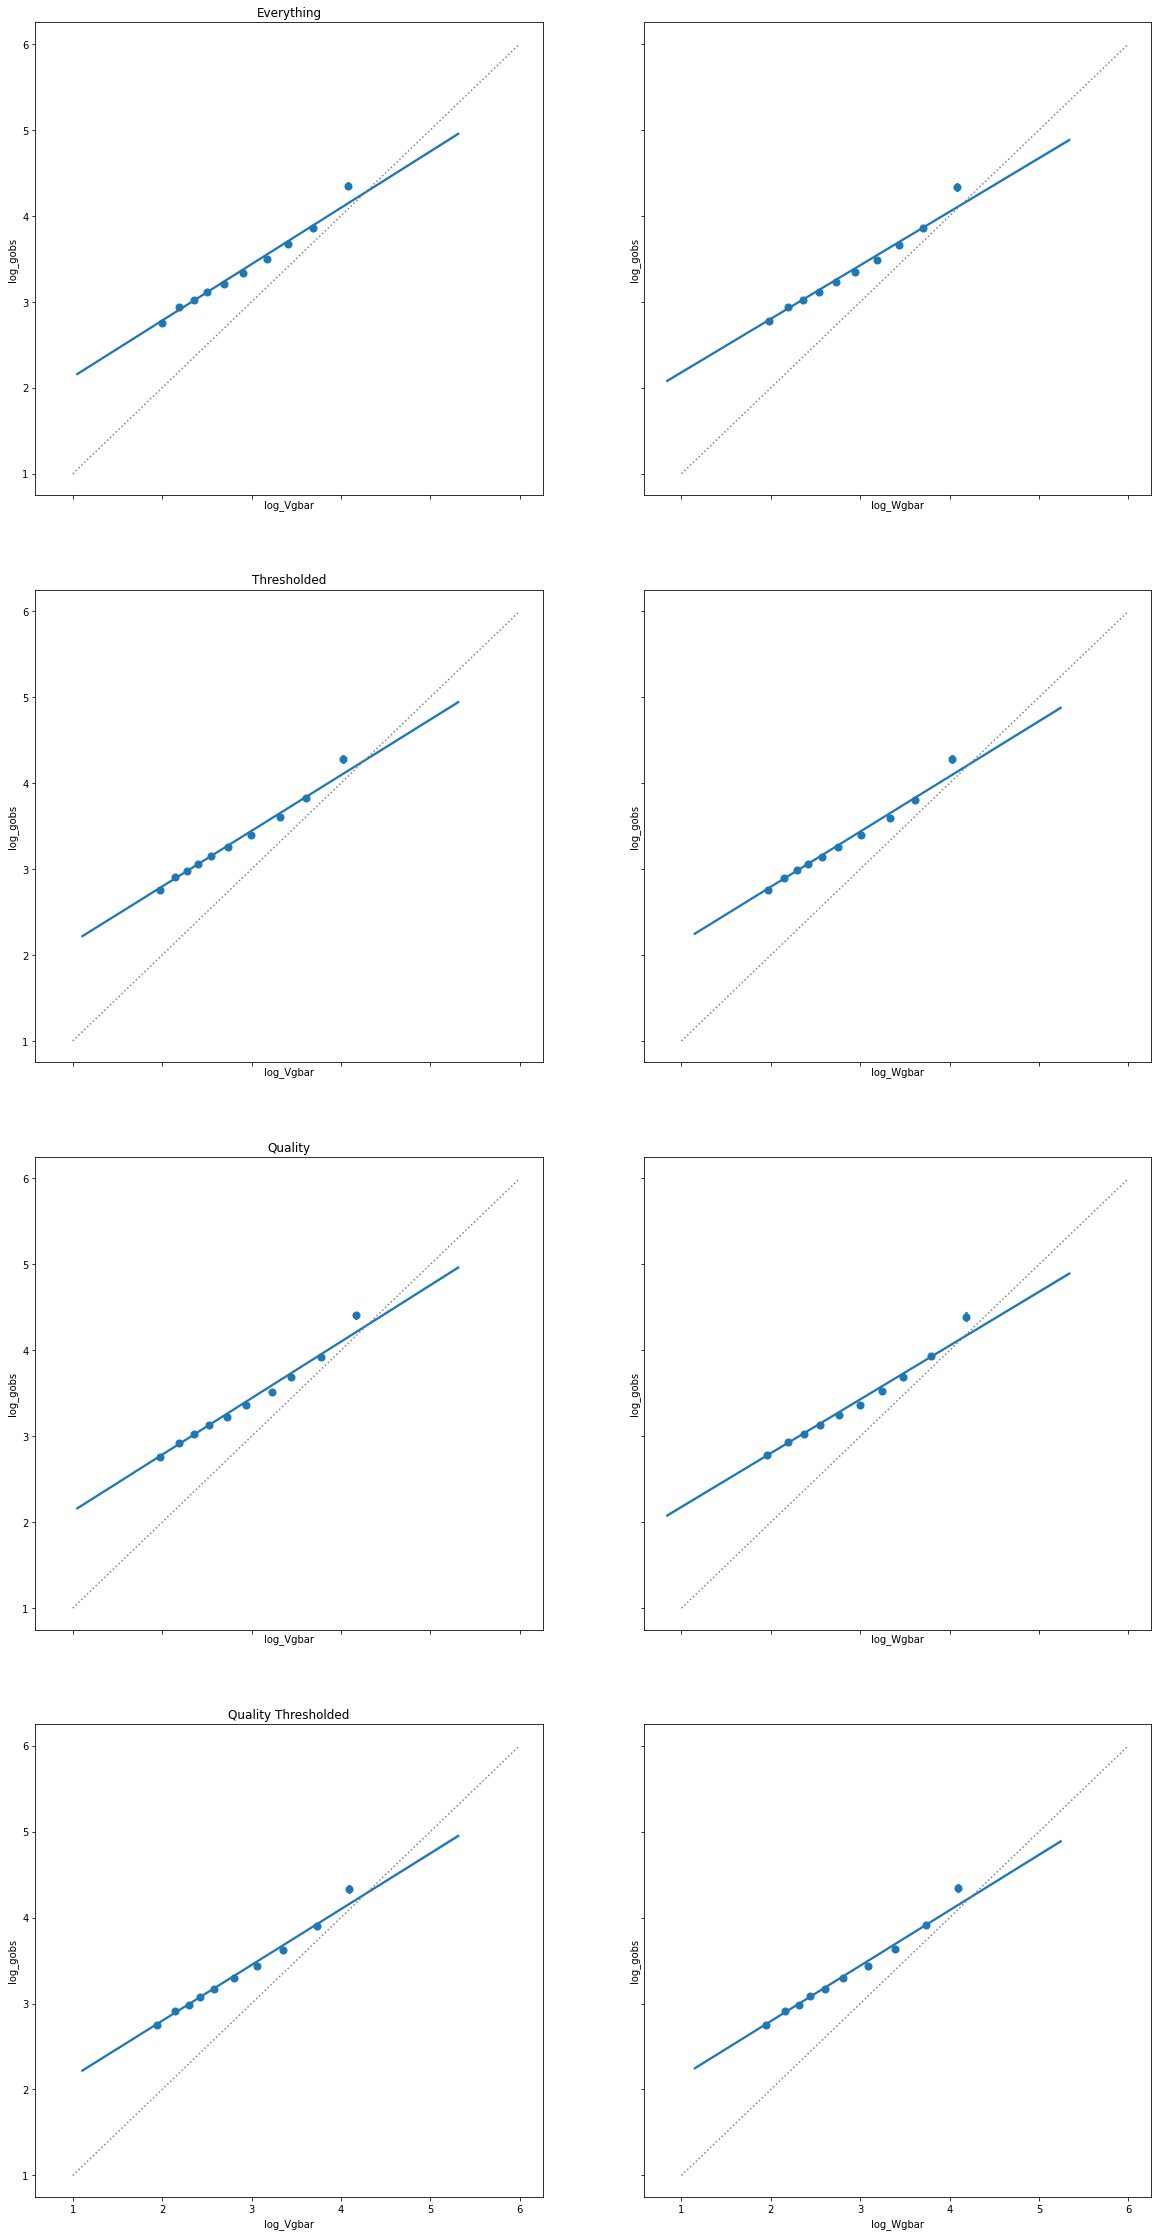

In [4]:
rar = Result(adjustments=adjs.query("Source=='RAR'"))
rar.plot_rars()